# 流量波动检测

In [1]:
# 读取数据
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')  # 创建解析列的功能对象
df = pd.read_table('./datacode_for_book/chapter4/time_series.txt', delimiter='\t', index_col='date', date_parser=date_parse)  # 读取数据
df[:3]
ts_data = df['number'].astype('float32')  # 将列转换为float32类型
ts_data.describe()  # 打印输出时间序列数据概况

,number
date,
1991-03-01,281
1991-03-02,304
1991-03-03,292


count    149.000000
mean     164.382553
std       75.097740
min       47.000000
25%      100.000000
50%      156.000000
75%      201.000000
max      400.000000
Name: number, dtype: float64

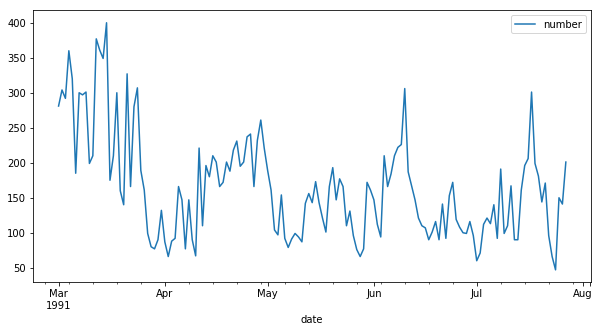

In [2]:
df.plot(figsize=(10,5))

In [3]:
#稳定性检测
'''
adf_test的返回值
Test statistic：代表检验统计量
p-value：代表p值检验的概率
Lags used：使用的滞后k，autolag=AIC时会自动选择滞后
Number of Observations Used：样本数量
Critical Value(5%) : 显著性水平为5%的临界值。
(1)假设是存在单位根，即不平稳；
(2)显著性水平，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。
(3)看P值和显著性水平a的大小，p值越小，小于显著性水平的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的
(4)看检验统计量和临界值，检验统计量小于临界值的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的
'''
from statsmodels.tsa.stattools import adfuller  # adf检验库
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts_data)
adf
pvalue
usedlag
nobs
critical_values
icbest
#adf值小于critical_values中的三个值，且P值小于0.01，则拒绝原假设（存在单位根，数据不稳定），认为数据稳定。

'\nadf_test的返回值\nTest statistic：代表检验统计量\np-value：代表p值检验的概率\nLags used：使用的滞后k，autolag=AIC时会自动选择滞后\nNumber of Observations Used：样本数量\nCritical Value(5%) : 显著性水平为5%的临界值。\n(1)假设是存在单位根，即不平稳；\n(2)显著性水平，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。\n(3)看P值和显著性水平a的大小，p值越小，小于显著性水平的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的\n(4)看检验统计量和临界值，检验统计量小于临界值的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的\n'

-3.7642778196383406

0.0032946903802968273

11

137

{'1%': -3.479007355368944,
 '5%': -2.8828782366015093,
 '10%': -2.5781488587564603}

1405.3846604574503

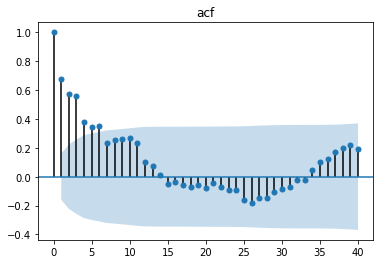

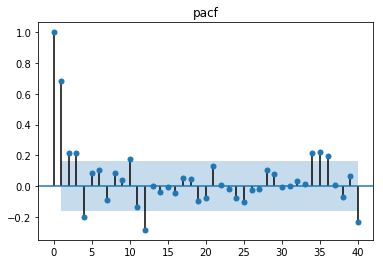

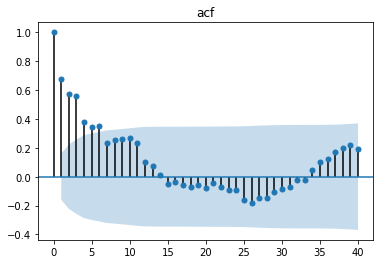

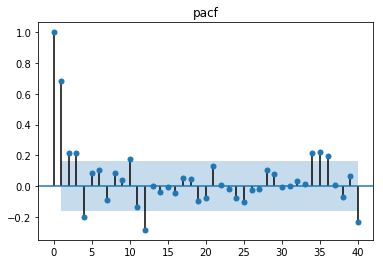

In [4]:
#自相关、偏相关曲线
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # acf和pacf展示库
plot_acf(ts_data, lags=40, title='acf')  # 自相关检测
plot_pacf(ts_data, lags=40, title='pacf')  # 偏相关检测

In [5]:
#白噪音检测

'''acorr_ljungbox(x, lags=None, boxpierce=False)函数检验无自相关
lags为延迟期数，如果为整数，则是包含在内的延迟期数，如果是一个列表或数组，那么所有时滞都包含在列表中最大的时滞中
boxpierce为True时表示除开返回LB统计量还会返回Box和Pierce的Q统计量
返回值：
lbvalue:测试的统计量
pvalue:基于卡方分布的p统计量
bpvalue:((optionsal), float or array) – test statistic for Box-Pierce test
bppvalue:((optional), float or array) – p-value based for Box-Pierce test on chi-square distribution
'''
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
lbvalue, pvalue = acorr_ljungbox(df['number'], lags=20)  # 白噪声检验结果
lbvalue, pvalue

'acorr_ljungbox(x, lags=None, boxpierce=False)函数检验无自相关\nlags为延迟期数，如果为整数，则是包含在内的延迟期数，如果是一个列表或数组，那么所有时滞都包含在列表中最大的时滞中\nboxpierce为True时表示除开返回LB统计量还会返回Box和Pierce的Q统计量\n返回值：\nlbvalue:测试的统计量\npvalue:基于卡方分布的p统计量\nbpvalue:((optionsal), float or array) – test statistic for Box-Pierce test\nbppvalue:((optional), float or array) – p-value based for Box-Pierce test on chi-square distribution\n'

(array([ 70.22298948, 120.88453858, 168.90419659, 190.88307984,
        209.62441028, 229.35916411, 238.21336143, 248.5308632 ,
        259.207545  , 270.78588472, 279.3969887 , 281.01780521,
        281.83956283, 281.87007792, 282.32172672, 282.56969134,
        283.08929145, 284.00830622, 284.60087407, 285.653256  ]),
 array([5.29655619e-17, 5.62672868e-27, 2.19396047e-36, 3.42397042e-40,
        2.47639330e-43, 1.04907420e-46, 8.91300423e-48, 3.52886217e-49,
        1.13268663e-50, 2.28396806e-52, 1.89817100e-53, 4.49486288e-53,
        1.50177353e-52, 7.05058202e-52, 2.60582826e-51, 1.02544479e-50,
        3.43489691e-50, 9.25252099e-50, 2.83068248e-49, 6.80385514e-49]))

In [6]:
from statsmodels.tsa.arima_model import ARMA  # ARMA库
max_count = int(len(ts_data) / 10)  # 最大循环次数最大定义为记录数的10%
bic = float('inf')  # 初始值为正无穷
tmp_score = []  # 临时p、q、aic、bic和hqic的值的列表
for tmp_p in range(max_count + 1):  # p循环max_count+1次
    for tmp_q in range(max_count + 1):  # q循环max_count+1次
        model = ARMA(ts_data, order=(tmp_p, tmp_q),freq='D')  # 创建ARMA模型对象
        try:
            results_ARMA = model.fit(disp=-1, method='css')  # ARMA模型训练
        except:
            continue  # 遇到报错继续
        finally:
            tmp_aic = results_ARMA.aic  # 模型的获得aic
            tmp_bic = results_ARMA.bic  # 模型的获得bic
            tmp_hqic = results_ARMA.hqic  # 模型的获得hqic
            tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])  # 追加每个模型的训练参数和结果
            if tmp_bic < bic:  # 如果模型bic小于最小值，那么获得最优模型ARMA的下列参数：
                p = tmp_p  # 最优模型ARMA的p值
                q = tmp_q  # 最优模型ARMA的q值
                model_arma = results_ARMA  # 最优模型ARMA的模型对象
                aic = tmp_bic  # 最优模型ARMA的aic
                bic = tmp_bic  # 最优模型ARMA的bic
                hqic = tmp_bic  # 最优模型ARMA的hqic
pdq_metrix = np.array(tmp_score)  # 将嵌套列表转换为矩阵
pdq_pd = pd.DataFrame(pdq_metrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])  # 基于矩阵创建数据框
pdq_pd

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed

,p,q,aic,bic,hqic
0,0.0,0.0,1712.839862,1718.847755,1715.280770
1,0.0,1.0,1653.446702,1662.458541,1657.108063
2,0.0,2.0,1648.868523,1660.884308,1653.750338
3,0.0,3.0,1618.676555,1633.696287,1624.778824
4,0.0,4.0,1619.720071,1637.743748,1627.042793
5,0.0,5.0,1619.720071,1637.743748,1627.042793
6,0.0,6.0,1601.914727,1625.946297,1611.678357
7,0.0,7.0,1603.490230,1630.525746,1614.474313
8,0.0,8.0,1603.310918,1633.350381,1615.515455
9,0.0,9.0,1605.309821,1638.353230,1618.734812


In [7]:
start = '1991-07-28'  # 设置预测开始的时间索引
end = '1991-08-02'  # 设置预测结束的时间索引
model_arma
model_arma.predict(start=start, end=end)

1991-07-28    180.324135
1991-07-29    163.852458
1991-07-30    149.992696
1991-07-31    171.999813
1991-08-01    140.003496
1991-08-02    125.021993
Freq: D, dtype: float64

In [8]:
#第一个数组返回的是预测值，与predict一致
#第二个数据是标准差
#第三个数组是置信区间95%的上下限
model_arma.forecast(steps=6,alpha=0.05)

(array([180.3241345 , 163.85245841, 149.99269576, 171.99981285,
        140.00349597, 125.02199276]),
 array([36.0856057 , 40.5810728 , 46.98695774, 48.24748598, 48.58606856,
        48.79643771]),
 array([[109.59764698, 251.05062203],
        [ 84.31501726, 243.38989956],
        [ 57.89995085, 242.08544066],
        [ 77.43647798, 266.56314772],
        [ 44.77655144, 235.23044049],
        [ 29.38273227, 220.66125325]]))

# 基于自动节点数的数据异常原因下探分析

In [1]:
with open('./datacode_for_book/chapter7/advertising_data.csv','r',encoding='utf-8') as f:
    data = pd.read_csv(f,parse_dates=['date'])

data[:3]
data.dtypes

,date,source,site,channel,media,visit
0,2017-05-15,品牌营销_品牌词,品牌词产品,播放器播放标签,PC,17600
1,2017-05-15,手机_品牌营销_品牌词,品牌词广告,15秒前贴片_app,app,15865
2,2017-05-15,SEO,百度,WAP,-,10858


date       datetime64[ns]
source             object
site               object
channel            object
media              object
visit              object
dtype: object

In [2]:
data['visit'] = data['visit'].replace('-',0).astype(np.int64)

In [3]:
data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,10693,31,2017-05-15 00:00:00,407,2017-05-15 00:00:00,2017-06-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,10693,25,搜索,2557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site,10693,172,百度,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,10693,274,PC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
media,10693,469,-,873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit,10693,NaN,NaN,NaN,NaN,NaN,319.754,1995.3,0,1,3,22,63587


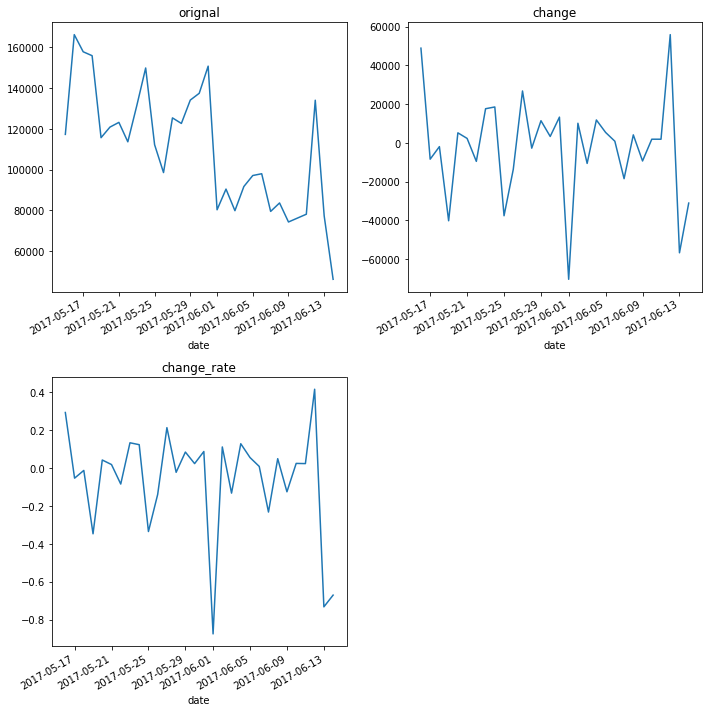

,visit,change,change_rate
date,,,
2017-05-15,117260,NaN,NaN
2017-05-16,166124,48864.0,0.294
2017-05-17,157727,-8397.0,-0.053


In [4]:
day_summary = data.groupby('date')['visit'].sum()
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
day_summary.plot(title='orignal',x_compat=True)
day_change_value = day_summary.diff(1).rename('change')
fig.add_subplot(2,2,2)
day_change_value.plot(title='change',x_compat=True)
day_change_rate = (day_change_value/day_summary).round(3).rename('change_rate')
fig.add_subplot(2,2,3)
day_change_rate.plot(title='change_rate',x_compat=True)
plt.tight_layout()
plt.show()

data_summary_total = pd.concat([day_summary,day_change_value,day_change_rate],axis=1)
data_summary_total[:3]

In [5]:
import datetime
# 指定日期自动下探分解
the_day = pd.datetime(2017, 6, 7)  # 指定要分析的日期
previous_day = the_day - datetime.timedelta(1)  # 自动获取前1天日期
the_data_tmp = data[data['date'] == the_day].rename(columns={'visit': the_day})  # 获得指定日期数据
the_data_tmp[:3]
previous_data_tmp = data[data['date'] == previous_day].rename(columns={'visit': previous_day})  # 获得前1天日期数据
previous_data_tmp[:3]

,date,source,site,channel,media,2017-06-07 00:00:00
8279,2017-06-07,品牌营销_品牌词,品牌词产品,播放器播放标签,PC,18372
8280,2017-06-07,SEO,百度,PC,-,10039
8281,2017-06-07,SEO,百度,WAP,-,9440


,date,source,site,channel,media,2017-06-06 00:00:00
7943,2017-06-06,CRM,准会员,电视,APP,22456
7944,2017-06-06,品牌营销_品牌词,品牌词产品,播放器播放标签,PC,19754
7945,2017-06-06,SEO,百度,PC,-,11149


In [6]:
dimension_list = ['source', 'site', 'channel', 'media']  # 指定要分析的维度：4个层级
split_node_list = ['全站']  # 每层分裂节点名称列表
change_list = list()  # 每层分裂节点对应的总变化量
increase_node_list = []  # 每层最大增长贡献最大的1个维度
decrease_node_list = []  # 每层最小增长贡献最大的1个维度

for dimension in dimension_list:  # 遍历每个维度
#     dimension
    the_data_merge = the_data_tmp[[dimension, the_day]]  # 获得指定日期的特定维度和访问量
    the_day_group = the_data_merge.groupby(dimension).sum()
    previous_data_merge = previous_data_tmp[[dimension, previous_day]]  # 获得指定日期前1天的特定维度和访问量
    previous_day_group = previous_data_merge.groupby(dimension).sum()
#     the_day_group[:3]
    merge_data = pd.merge(the_day_group, previous_day_group, how='outer', left_index=True,right_index=True)  # 合并2天的数据
    merge_data = merge_data.fillna(0)  # 将缺失值（没有匹配的值）替换为0
    merge_data['change'] = merge_data[the_day] - merge_data[previous_day]  # 计算环比变化量
    merge_data['change_rate'] = merge_data['change'] / merge_data[previous_day]  # 计算环比变化率
    total_chage = merge_data['change'].sum()  # 获得分裂节点的总变化值
    change_list.append(total_chage)  # 将每个节点的变化值加入列表
    
    merge_data = merge_data.sort_values(by='change')  # 按环比变化量正向排序
#     merge_data[:3]
    max_increase_node = merge_data.iloc[-1,:].name  # 获得增长变化量最大值节点名称
    max_value, max_rate = merge_data.iloc[-1,2:4]  # 获得最大值节点变化量以及变化比例
    increase_node_list.append([max_increase_node, int(max_value), max_rate])  # 将最大值信息追加到列表
    
    min_increase_node = merge_data.iloc[0,:].name  # 获得增长变化量最小值节点名称
    min_value, min_rate = merge_data.iloc[0,2:4]  # 获得最小值节点变化量以及变化比例
    decrease_node_list.append([min_increase_node, int(min_value), min_rate])  # 将最小值信息追加到列表
#     max_increase_node
#     min_increase_node
        # part5
    if total_chage >= 0:  # 判断为增长方向
        split_node_list.append(max_increase_node)  # 将分裂节点定义为增长最大值节点
        rules_len = len(split_node_list)  # 通过分裂节点的个数判断所处分裂层级
        if rules_len == 2:  # 第二层source，第一层为全站整体
            the_data_tmp = the_data_tmp[the_data_tmp['source'] == max_increase_node]  # 以source为维度过滤出指定日期符合最大节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['source'] == max_increase_node]  # 以source为维度过滤出前1天符合最大节点条件的数据
        elif rules_len == 3:  # 第三层site
            the_data_tmp = the_data_tmp[the_data_tmp['site'] == max_increase_node]  # 以site为维度过滤出指定日期符合最大节点条件的数据
            previous_day_data_tmp = previous_data_tmp[
                previous_data_tmp['site'] == max_increase_node]  # 以site为维度过滤出前1天符合最大节点条件的数据
        elif rules_len == 4:  # 第四层channel
            the_data_tmp = the_data_tmp[the_data_tmp['channel'] == max_increase_node]  # 以channel为维度过滤出指定日期符合最大节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['channel'] == max_increase_node]  # 以channel为维度过滤出前1天符合最大节点条件的数据
        elif rules_len == 5:  # 第五层media
            the_data_tmp = the_data_tmp[the_data_tmp['media'] == max_increase_node]  # 以media为维度过滤出指定日期符合最大节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['media'] == max_increase_node]  # 以media为维度过滤出前1天符合最大节点条件的数据
    # part6
    else:  # 判断为下降方向
        split_node_list.append(min_increase_node)  # 将分裂节点定义为增长最小值节点
        rules_len = len(split_node_list)  # 通过分裂节点的个数判断所处分裂层级
        if rules_len == 2:  # 第二层source
            the_data_tmp = the_data_tmp[the_data_tmp['source'] == min_increase_node]  # 以source为维度过滤出指定日期符合最小节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['source'] == min_increase_node]  # 以source为维度过滤出前1天符合最小节点条件的数据
        elif rules_len == 3:  # 第三层site
            the_data_tmp = the_data_tmp[the_data_tmp['site'] == min_increase_node]  # 以site为维度过滤出指定日期符合最大节点条件的数据
            previous_day_data_tmp = previous_data_tmp[
                previous_data_tmp['site'] == min_increase_node]  # 以site为维度过滤出前1天符合最大节点条件的数据
        elif rules_len == 4:  # 第四层channel
            the_data_tmp = the_data_tmp[the_data_tmp['channel'] == min_increase_node]  # 以channel为维度过滤出指定日期符合最大节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['channel'] == min_increase_node]  # 以channel为维度过滤出前1天符合最大节点条件的数据
        elif rules_len == 5:  # 第五层media
            the_data_tmp = the_data_tmp[the_data_tmp['media'] == min_increase_node]  # 以media为维度过滤出指定日期符合最大节点条件的数据
            previous_data_tmp = previous_data_tmp[
                previous_data_tmp['media'] == min_increase_node]  # 以media为维度过滤出前1天符合最大节点条件的数据
    

change_list
increase_node_list
decrease_node_list
split_node_list

[-18455, -17591.0, -17681.0, -19070]

[['公众号', 2444, 1.711484593837535],
 ['邮件', 1, inf],
 ['商城', 1378, 0.28858638743455495],
 ['站内信', 1, 0.2]]

[['CRM', -17591, -0.6150914367635232],
 ['准会员', -17575, -0.6168181658653002],
 ['电视', -19070, -0.8017321113259901],
 ['APP', -19024, -0.8471677947987175]]

['全站', 'CRM', '准会员', '电视', 'APP']

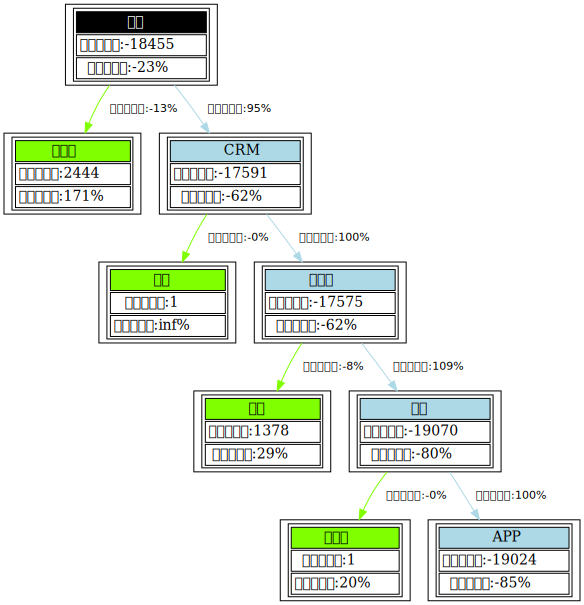

In [39]:
from graphviz import Digraph  # 画图用库
# 画图展示自动下探结果
# patr1
node_style = {'fontname': "SimSun", 'shape': 'box'}  # 定义node节点样式
edge_style = {'fontname': "SimHei", 'fontsize': '11'}  # 定义edge节点样式
top_node_style = '<<table><tr><td bgcolor="black"><font color="white">{0}</font></td></tr><tr><td>环比变化量:{1:d}</td></tr><tr><td>环比变化率:{2:.0%}</td></tr></table>>'  # 定义顶部node节点标签样式
left_node_style = '<<table><tr><td bgcolor="chartreuse"><font color="black">{0}</font></td></tr><tr><td>环比变化量:{1}</td></tr><tr><td>环比变化率:{2:.0%}</td></tr></table>>'  # 定义左侧node节点标签样式
right_node_style = '<<table><tr><td bgcolor="lightblue"><font color="black">{0}</font></td></tr><tr><td>环比变化量:{1}</td></tr><tr><td>环比变化率:{2:.0%}</td></tr></table>>'  # 定义右侧node节点标签样式
dot = Digraph(format='png', node_attr=node_style, edge_attr=edge_style)  # 创建有向图

for i in range(4):  # 循环读取每一层
    # part2
    node_name = split_node_list[i]  # 获得分裂节点名称
    node_left, max_value, max_rate = increase_node_list[i]  # 获得增长最大值名称、变化量和变化率
    node_right, min_value, min_rate = decrease_node_list[i]  # 获得增长最小值名称、变化量和变化率
    node_change = change_list[i]  # 获得分裂节点的总变化量-非分裂节点变化量
    node_label_left = left_node_style.format(node_left, max_value, max_rate)  # 左侧节点显示的信息
    node_label_right = right_node_style.format(node_right, min_value, min_rate)  # 右侧节点显示的信息
    # part3
    if i == 0:  # 如果是顶部节点，则单独增加顶部节点信息
        day_data = data_summary_total[data_summary_total.index == the_day]  # 获得顶部节点的数据
        former_data = day_data.iloc[0,1]  # 获得全站总变化量
        node_lable = top_node_style.format(node_name, int(former_data), day_data.iloc[0, 2])  # 分别获取顶部节点名称、变化量和变化率
        dot.node(node_name, label=node_lable)  # 增加顶部节点
    # part4
    contribution_rate_1 = float(max_value) / former_data  # 获得左侧变化量贡献率
    contribution_rate_2 = float(min_value) / former_data  # 获得右侧变化量贡献率
    if node_change >= 0:  # 如果为增长，则左侧为正向
        edge_lablel_left = '正向贡献率:{0:.0%}'.format(contribution_rate_1)  # 左侧边的标签信息
        edge_lablel_right = '反向贡献率:{0:.0%}'.format(contribution_rate_2)  # 右侧边的标签信息
        former_data = max_value  # 获得上一层级变化量最大值
    else:  # 如果为下降，则右侧为正向
        edge_lablel_left = '反向贡献率:{0:.0%}'.format(contribution_rate_1)  # 左侧边的标签信息
        edge_lablel_right = '正向贡献率:{0:.0%}'.format(contribution_rate_2)  # 右侧边的标签信息
        former_data = min_value  # 获得上一层级变化量最大值
    # part5
    dot.node(node_left, label=node_label_left)  # 增加左侧节点
    dot.node(node_right, label=node_label_right)  # 增加右侧节点
    dot.edge(node_name, node_left, label=edge_lablel_left, color='chartreuse')  # 增加左侧边
    dot.edge(node_name, node_right, label=edge_lablel_right, color='lightblue')  # 增加右侧边

dot # 展示图形结果

'Digraph.gv.pdf'

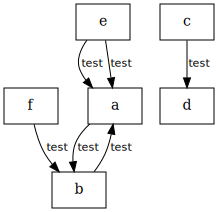

In [47]:
from graphviz import Digraph  # 画图用库
node_style = {'fontname': "SimSun", 'shape': 'box'}  # 定义node节点样式
edge_style = {'fontname': "SimHei", 'fontsize': '11'}  # 定义edge节点样式
dot = Digraph(node_attr=node_style,edge_attr=edge_style)
dot.node('a')
dot.node('b')
dot.node('d')
dot.node('e')
dot.node('f')
dot.edge('b','a',label='test')
dot.edge('a','b',label='test')
dot.edge('c','d',label='test')
dot.edge('e','a',label='test')
dot.edge('f','b',label='test')
dot.edge('e','a',label='test')

dot

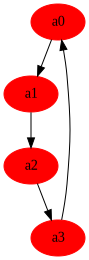

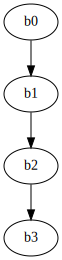

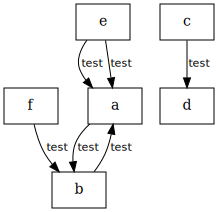

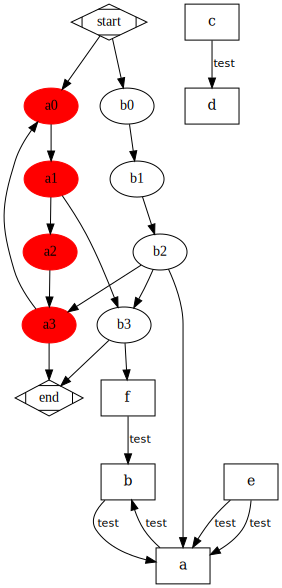

In [1]:
from graphviz import Digraph
grap_g = Digraph("G",format="pdf")


sub_g0 = Digraph(comment="process1",graph_attr={"style":'filled',"color":'blue'},node_attr={"style":"filled","color":"red"})
sub_g0.node("a0","a0")
sub_g0.node("a1","a1")
sub_g0.node("a2","a2")
sub_g0.node("a3","a3")
sub_g0.edge("a0","a1")
sub_g0.edge("a1","a2")
sub_g0.edge("a2","a3")
sub_g0.edge("a3", "a0")
sub_g0


sub_g1 = Digraph(comment="process1",graph_attr={"style":'filled'})
sub_g1.node("B","b0")
sub_g1.node("C","b1")
sub_g1.node("D","b2")
sub_g1.node("E","b3")
sub_g1.edges(["BC","CD","DE"])
sub_g1

node_style = {'fontname': "SimSun", 'shape': 'box'}  # 定义node节点样式
edge_style = {'fontname': "SimHei", 'fontsize': '11'}  # 定义edge节点样式
sub_g2 = Digraph(node_attr=node_style,edge_attr=edge_style)
sub_g2.node('a')
sub_g2.node('b')
sub_g2.node('d')
sub_g2.node('e')
sub_g2.node('f')
sub_g2.edge('b','a',label='test')
sub_g2.edge('a','b',label='test')
sub_g2.edge('c','d',label='test')
sub_g2.edge('e','a',label='test')
sub_g2.edge('f','b',label='test')
sub_g2.edge('e','a',label='test')
sub_g2

grap_g.node("start", label="start",shape="Mdiamond")
grap_g.node("end", label="end", shape="Mdiamond")
grap_g.subgraph(sub_g0)
grap_g.subgraph(sub_g1)
grap_g.subgraph(sub_g2)
grap_g.edge("start","a0")
grap_g.edge("start","B")

grap_g.edge("a1","E")
grap_g.edge("D","a3")
grap_g.edge("D","a")
grap_g.edge("E","f")

grap_g.edge("a3","end")
grap_g.edge("E","end")
grap_g

# 基于自动K值的KMeans广告效果聚类分析

In [57]:
with open('./datacode_for_book/chapter7/ad_performance.txt','r',encoding='utf-8') as f:
    data = pd.read_csv(f,sep='\t')
data[:3]

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20.0,jpg,banner,roi,140*40,打折
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19.0,jpg,banner,cpc,140*40,满减
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4.0,jpg,banner,cpc,140*40,满减


In [58]:
data['平均停留时间'] = data['平均停留时间'].astype('float64')
data['平均停留时间'] = data['平均停留时间'].fillna(data['平均停留时间'].mean())

In [59]:
data.info()
data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
渠道代号      889 non-null object
日均UV      889 non-null float64
平均注册率     889 non-null float64
平均搜索量     889 non-null float64
访问深度      889 non-null float64
平均停留时间    889 non-null float64
订单转化率     889 non-null float64
投放总时间     889 non-null float64
素材类型      889 non-null object
广告类型      889 non-null object
合作方式      889 non-null object
广告尺寸      889 non-null object
广告卖点      889 non-null object
dtypes: float64(7), object(6)
memory usage: 90.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
渠道代号,889,889,A623,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
日均UV,889,NaN,NaN,NaN,540.847,1634.41,0.06,6.18,114.18,466.87,25294.8
平均注册率,889,NaN,NaN,NaN,0.00140776,0.003291,0,0,0,0.0014,0.0391
平均搜索量,889,NaN,NaN,NaN,0.0304928,0.106199,0,0.0006,0.0032,0.0118,1.037
访问深度,889,NaN,NaN,NaN,2.16717,3.80053,1,1.3923,1.7931,2.2162,98.9799
平均停留时间,889,NaN,NaN,NaN,262.669,224.112,1.64,126.2,236.66,357.93,4450.83
订单转化率,889,NaN,NaN,NaN,0.00285163,0.0116078,0,0,0.0002,0.002,0.2165
投放总时间,889,NaN,NaN,NaN,16.0529,8.50944,1,9,16,24,30
素材类型,889,4,jpg,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
广告类型,889,6,不确定,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
from sklearn.feature_extraction import DictVectorizer
# 字符串分类转整数分类
# part1
conver_cols = ['素材类型', '广告类型', '合作方式', '广告尺寸', '广告卖点']
convert_matrix = data[conver_cols]  # 获得要转换的数组
lines = data.shape[0]  # 获得总记录数
dict_list = []  # 总空列表，用于存放字符串与对应索引组成的字典
unique_list = []  # 总唯一值列表，用于存储每个列的唯一值列表
# part2
for col_name in conver_cols:  # 循环读取每个列名
    cols_unqiue_value = data[col_name].unique().tolist()  # 获取列的唯一值列表
    unique_list.append(cols_unqiue_value)  # 将唯一值列表追加到总列表
# part3
for line_index in range(lines):  # 读取每行索引
    each_record = convert_matrix.iloc[line_index]  # 获得每行数据，是一个Series
#     each_record
    for each_index, each_data in enumerate(each_record):  # 读取Series每行对应的索引值
        list_value = unique_list[each_index]  # 读取该行索引对应到总唯一值列表列索引下的数据(其实是相当于原来的列做了转置成了行，目的是查找唯一值在列表中的位置)
        each_record[each_index] = list_value.index(each_data)  # 获得每个值对应到总唯一值列表中的索引
    each_dict = dict(each_record) #dict(zip(conver_cols, each_record))  # 将每个值和对应的索引组合字典
#     each_dict
    dict_list.append(each_dict)  # 将字典追加到总列表
# part4
model_dvtransform = DictVectorizer(sparse=False, dtype=np.int64)  # 建立转换模型对象
data_dictvec = model_dvtransform.fit_transform(dict_list)  # 应用分类转换训练
data_dictvec[:3]

array([[0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0]], dtype=int64)

In [62]:
from sklearn.preprocessing import MinMaxScaler
# 数据标准化
sacle_matrix = data.iloc[:, 1:8]  # 获得要转换的矩阵
minmax_scaler = MinMaxScaler()  # 建立MinMaxScaler模型对象
data_scaled = minmax_scaler.fit_transform(sacle_matrix)  # MinMaxScaler标准化处理
data_scaled[:3]

array([[1.43508267e-04, 1.81585678e-01, 2.06364513e-02, 1.33404913e-02,
        9.39789040e-02, 1.19168591e-01, 6.55172414e-01],
       [7.06234624e-03, 1.02301790e-01, 3.12439730e-02, 1.07052569e-02,
        3.51299900e-02, 1.38568129e-02, 6.20689655e-01],
       [3.62565928e-03, 5.62659847e-02, 5.11089682e-02, 8.95183604e-03,
        8.00797449e-02, 1.20092379e-02, 1.03448276e-01]])

In [64]:
X = np.hstack([data_scaled,data_dictvec])
X[:3]

array([[1.43508267e-04, 1.81585678e-01, 2.06364513e-02, 1.33404913e-02,
        9.39789040e-02, 1.19168591e-01, 6.55172414e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06234624e-03, 1.02301790e-01, 3.12439730e-02, 1.07052569e-02,
        3.51299900e-02, 1.38568129e-02, 6.20689655e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.62565928e-03, 5.62659847e-02, 5.11089682e-02, 8.95183604e-03,
        8.00797449e-02, 1.20092379e-02, 1.03448276e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(2, 10):  # 遍历从2到10几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # 建立聚类模型对象
    cluster_labels_tmp = model_kmeans.fit_predict(X)  # 训练聚类模型
    silhouette_tmp = silhouette_score(X, cluster_labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 将最好的K存储下来
        silhouette_int = silhouette_tmp  # 将最好的平均轮廓得分存储下来
        best_kmeans = model_kmeans  # 将最好的模型存储下来
        cluster_labels_k = cluster_labels_tmp  # 将最好的聚类标签存储下来
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print ('{:*^60}'.format('K value and silhouette summary:'))
print (np.array(score_list))  # 打印输出所有K下的详细得分
print ('Best K is:{0} with average silhouette of {1}'.format(best_k, silhouette_int.round(4)))

**************K value and silhouette summary:***************
[[2.         0.46692821]
 [3.         0.54904646]
 [4.         0.56968547]
 [5.         0.48186604]
 [6.         0.45477667]
 [7.         0.48204261]
 [8.         0.50447223]
 [9.         0.52697493]]
Best K is:4 with average silhouette of 0.5697


In [68]:
# 针对聚类结果的特征分析
# part1
cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters'])  # 获得训练集下的标签信息
merge_data = pd.concat((data, cluster_labels), axis=1)  # 将原始处理过的数据跟聚类标签整合
merge_data[:3]

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点,clusters
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20.0,jpg,banner,roi,140*40,打折,3
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19.0,jpg,banner,cpc,140*40,满减,3
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4.0,jpg,banner,cpc,140*40,满减,3


In [70]:
clustering_count = pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).count()).T.rename(
    {'渠道代号': 'counts'})  # 计算每个聚类类别的样本量
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename({'counts': 'percentage'})  # 计算每个聚类类别的样本量占比
clustering_ratio.T

,percentage
clusters,
0,0.46
1,0.33
2,0.03
3,0.17


In [78]:
cluster_features = []  # 空列表，用于存储最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters'] == line]  # 获得特定类的数据

    part1_data = label_data.iloc[:, 1:8]  # 获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2, :]  # 得到数值型特征的均值

    part2_data = label_data.iloc[:, 8:-1]  # 获得字符串型数据特征
    part2_desc = part2_data.describe(include='all')  # 获得字符串型数据特征的描述性统计信息
    merge_data2 = part2_desc.iloc[2, :]  # 获得字符串型数据特征的最频繁值

    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  # 将数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line)  # 将每个类别下的数据特征追加到列表
DataFrame(cluster_features).T

,0,1,2,3
日均UV,1369.81,1194.69,1263.03,2718.7
平均注册率,0.003,0.003,0.003,0.005
平均搜索量,0.082,0.144,0.151,0.051
访问深度,0.918,5.728,9.8,0.948
平均停留时间,165.094,285.992,374.689,104.14
订单转化率,0.009,0.016,0.017,0.007
投放总时间,8.462,8.57,7.996,8.569
素材类型,swf,jpg,swf,jpg
广告类型,不确定,不确定,通栏,banner
合作方式,cpc,cpc,cpc,cpc


In [76]:
cluster_pd = DataFrame(cluster_features).T  # 将列表转化为矩阵
print ('{:*^60}'.format('Detailed features for all clusters:'))
all_cluster_set = pd.concat((clustering_count, clustering_ratio, cluster_pd), axis=0)  # 将每个聚类类别的所有信息合并
print (all_cluster_set)

************Detailed features for all clusters:*************
clusters          0        1        2        3
counts          411      297       27      154
percentage     0.46     0.33     0.03     0.17
日均UV        1369.81  1194.69  1263.03   2718.7
平均注册率         0.003    0.003    0.003    0.005
平均搜索量         0.082    0.144    0.151    0.051
访问深度          0.918    5.728      9.8    0.948
平均停留时间      165.094  285.992  374.689   104.14
订单转化率         0.009    0.016    0.017    0.007
投放总时间         8.462     8.57    7.996    8.569
素材类型            swf      jpg      swf      jpg
广告类型            不确定      不确定       通栏   banner
合作方式            cpc      cpc      cpc      cpc
广告尺寸         600*90   600*90  900*120  308*388
广告卖点             打折       直降       打折       满减


In [79]:
# 各类别显著数值特征对比
# part1
num_sets = cluster_pd.iloc[:6, :].T.astype(np.float64)  # 获取要展示的数据
num_sets_max_min = minmax_scaler.fit_transform(num_sets)  # 获得标准化后的数据
num_sets_max_min[:3]

array([[0.11490468, 0.        , 0.31      , 0.        , 0.22529745,
        0.2       ],
       [0.        , 0.        , 0.93      , 0.5415447 , 0.6721592 ,
        0.9       ],
       [0.04483892, 0.        , 1.        , 1.        , 1.        ,
        1.        ]])

(<a list of 14 Line2D ticklines objects>,
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.05, '各聚类类别显著特征对比')

(-0.2, 1.2)

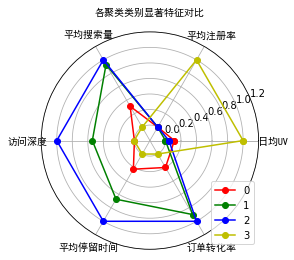

In [84]:
# part2
fig = plt.figure()  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(merge_data1.index[:-1])  # 设置要展示的数据标签
cor_list = ['r', 'g', 'b', 'y']  # 定义不同类别的颜色
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # 计算各个区间的角度
angles = np.concatenate((angles, [angles[0]]))  # 建立相同首尾字段以便于闭合
# part3
for i in range(len(num_sets)):  # 循环每个类别
    data_tmp = num_sets_max_min[i, :]  # 获得对应类数据
    data = np.concatenate((data_tmp, [data_tmp[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles, data, 'o-', c=cor_list[i], label=i)  # 画线
# part4
ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties="SimHei")  # 设置极坐标轴
ax.set_title("各聚类类别显著特征对比", fontproperties="SimHei")  # 设置标题放置
ax.set_rlim(-0.2, 1.2)  # 设置坐标轴尺度范围
plt.legend(loc=0)  # 设置图例位置
